In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
from google.colab import drive
import statsmodels.api as sm
from statistics import mean 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
#Camilla's Path

df = pd.read_csv('/content/gdrive/My Drive/pres_survey_data_hashed.csv')
cb = pd.read_csv('/content/gdrive/My Drive/modeling_codebook_categorized.csv')
groups = pd.read_csv('/content/gdrive/My Drive/party_primary_drafts_v3.csv')
og_data = pd.read_csv('/content/gdrive/My Drive/bluelabs_historical_data.csv') # This is the data originally labelled "columbia_qmss_survey_ids_hashed000"

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,249) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Will's path to updated data file
df = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/Presidential Model Team/pres_survey_data_hashed.csv')
cb = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/Modeling Codebook - Categorized.csv')
groups = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/Presidential Model Team/Old Models/party_primary_drafts_v3.csv')
og_data = pd.read_csv('/content/gdrive/MyDrive/QMSS Practicum: Bluelabs/bluelabs.data.csv') # This is the data originally labelled "columbia_qmss_survey_ids_hashed000"

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10,250) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Create non registered states dataframe
df.indy.unique()
non_registered_states = df[ df['indy'] != 1]
non_registered_states = non_registered_states[ non_registered_states['rep'] != 1]
non_registered_states = non_registered_states[ non_registered_states['dem'] != 1]
pd.set_option('display.max_columns', None)
non_registered_states.head()

,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,Unnamed: 0.1,hash_id,survey_id,support_senate,support_pres,support_gov,reg_voter_flag,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,indy,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2020,early_vote_method_g2018,ineligible_2008to2022
842,861,1,0,0,1,0,0,0,862,49be2d6e7d8309811f1b2da13e9feb46,PRES 2020,NaN,3.0,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,0.0,NaN,0.0,0
843,862,0,0,0,0,0,0,1,863,329561fe707484a93a05de6c064032b8,PRES 2020,NaN,6.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2016.0,0.0,NaN,NaN,0
844,863,0,0,0,0,0,1,0,864,1e73ac8b32b2f63a567f0894f4cd26b4,PRES 2020,NaN,1.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0
845,864,0,0,0,0,0,1,0,865,1e5a309966ec8ce7d3cc87987ec004f0,PRES 2020,NaN,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.430589,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2020.0,0.0,0.0,NaN,0.0,0
866,885,1,0,0,1,0,0,0,886,728903ebf7de47dfe6844069bb636f53,PRES 2020,NaN,3.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2020.0,0.0,NaN,NaN,0


### Logistic Regression on Non-Registered States

Function that cleans data both row-and column-wise

In [ ]:
def clean(df):
  #Remove indy and first index
  remove_these_cols = ['indy', "Unnamed: 0.1"] 
  df = df.drop(columns = remove_these_cols)

  #Removing IDs where reg_voter_flag = 0 (unregistered voters)
  df = df[ df['reg_voter_flag'] == 1]

  #Remove any rows if they have more than 10 missing values
  df = df
  df = df[df.isnull().sum(axis=1) < 10]

  return(df)

Function that fills missing numeric values with mean and categorical with mode

In [ ]:
#Data Preprocessing (Convert categorical items to numeric)
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

def fill_missing(df):
  #Fill missing values with ~mode~ for CATEGORICAL data
  df_cat = df.select_dtypes(include=['O']) #Subset data down to categorical (object) type
  df_cat.fillna(df_cat.mode().iloc[0])

  df_cat = Encoder(df_cat)

  #Fill missing values with ~mean~ for NUMERIC data
  df_num = df.select_dtypes(include=[np.number]) #Subset data to columns of numeric type
  df_num = df_num.fillna(df_num.mean()) #Impute NAs with mean

  #concatenate df_num with df_cat
  df2 = pd.concat([df_num, df_cat], axis=1)

  return(df2)

In [ ]:
non_reg_hashed = clean(non_registered_states)
non_reg = fill_missing(non_reg_hashed)
non_reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,support_senate,support_pres,support_gov,reg_voter_flag,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2020,early_vote_method_g2018,ineligible_2008to2022,hash_id,survey_id
842,861,1,0,0,1,0,0,0,NaN,3.0,1.752537,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,0.0,NaN,0.000000,0,5943,0
843,862,0,0,0,0,0,0,1,NaN,6.0,1.752537,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2016.0,0.0,NaN,0.033454,0,4082,0
844,863,0,0,0,0,0,1,0,NaN,1.0,1.752537,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.033454,0,2460,0
845,864,0,0,0,0,0,1,0,NaN,1.0,1.752537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.430589,0.0,0.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2020.0,0.0,0.0,NaN,0.000000,0,2455,0
866,885,1,0,0,1,0,0,0,NaN,3.0,1.752537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2020.0,0.0,NaN,0.033454,0,9354,0


In [ ]:
##Drop all observations where support_pres is not dem or rep
non_reg = non_reg[(non_reg.support_pres == 1.0) | (non_reg.support_pres == 3.0)]

a = {1: 1, 3: 0} #Convert support_pres to binary, where support democrat = 1
non_reg['support_pres'] = non_reg['support_pres'].map(a)
non_reg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,bInner Ring,cOuter Ring,dRural,Income 030k-50k,Income 050k-75k,Income 075k-125k,Income 125k+,support_senate,support_pres,support_gov,reg_voter_flag,age_a22to29,age_b30to39,age_c40to49,age_d50to59,age_e60to69,age_f70to79,age_g80plus,gender_male,black,hispanic,asian,other_ethnicity,dem,rep,single,length_of_residence,children,children_3plus,homeowner,renter,bach_degree_modeled,post_grad_modeled,inactive_voter,absentee_voter,permanent_absentee_voter,early_voter,non_primary_voter,midterm_primary_ever,dem_primary_voter,dem_primary_only,rep_primary_voter,rep_primary_only,indy_primary_voter,indy_primary_only,dem_primary_mr,rep_primary_mr,indy_primary_mr,switch_primary_voter,switch_primary_dem_mr,switch_primary_rep_mr,midterm_voter,presidential_voter,new_registrant,non_voter,dem_hhr,rep_hhd,indy_hhod,indy_hhor,hh_black_u,hh_hispanic_u,hh_asian_u,hh_conservative_donor_u,hh_liberal_donor_u,hasreligion,catholic,christian,bible_reader,donrever_1,liberal_donor,conservative_donor,contbrel_1,contbpol_1,contbhlt_1,blue_collar,farmer,professional_technical,retired,apparel_1,bookmusc_1,electrnc_1,environm_1,outdgrdn_1,outdoor_1,guns_1,golf_1,veteran_1,expensive_items_1,cnty_pct_religious,evan_0to70,evan_100to140,evan_140to230,evan_230plus,spanish_lang_score,vote_pp2012_not_2008,vote_pp2008_not_2012,vote_g2012_or_g2008,vote_g2010_not_2006,vote_g2006_not_2010,vote_pp_or_p2012,vote_pp_or_p2008,greatest_year_d,greatest_year_r,greatest_year_i,early_vote_method_g2020,early_vote_method_g2018,ineligible_2008to2022,hash_id,survey_id
842,861,1,0,0,1,0,0,0,NaN,0,1.752537,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020.0,0.0,NaN,0.000000,0,5943,0
844,863,0,0,0,0,0,1,0,NaN,1,1.752537,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.033454,0,2460,0
845,864,0,0,0,0,0,1,0,NaN,1,1.752537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.430589,0.0,0.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2020.0,0.0,0.0,NaN,0.000000,0,2455,0
866,885,1,0,0,1,0,0,0,NaN,0,1.752537,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2020.0,0.0,NaN,0.033454,0,9354,0
867,886,1,0,0,0,0,0,1,NaN,0,1.752537,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.505319,0.0,1.0,0.0,0.0,14.518332,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2020.0,0.0,NaN,0.000000,0,14440,0


In [ ]:
#Manage the missing variables
keep = [column for column
        in list(non_reg)
        if len(non_reg[column].unique()) > 1]

non_reg = non_reg[keep]

In [ ]:
#Train Test Split

#Remove hash_id and index column (for now)

y = non_reg['support_pres']
X = non_reg.loc[:, (non_reg.columns != 'support_pres')] #This X keeps the hash ID and Index column
X1 = X.loc[:, X.columns != 'hash_id']
X1 = X.loc[:, X.columns != 'Unnamed: 0']

X_train, X_test, y_train, y_test = train_test_split(X1, y, random_state=42) 


In [ ]:
#Logistic regression with L1 regularization 
logreg = LogisticRegression(penalty="l1",solver='liblinear',C=1).fit(X_train, y_train)

print("logreg .coef_: {}".format(logreg .coef_))

logreg .coef_: [[-4.28502118e-01 -7.38738967e-01 -7.83109484e-01 -1.07833098e-01
  -2.84860275e-02 -1.04193078e-01 -1.09147774e-01  1.55680992e-01
   4.00315677e-01  2.77943956e-01 -1.65188734e-01 -2.35235208e-01
  -1.32526160e-01 -2.15998986e-01 -5.24952639e-01  9.67252582e-01
   5.01412809e-01  8.68488868e-01  1.79471619e+00  2.62465807e-01
   6.43182024e-03  9.06841925e-02 -3.69967940e-01  3.47230083e-02
   0.00000000e+00  2.61544573e-01  2.88692049e-01  1.38975632e-01
   6.98629936e-01  3.83404978e-01 -1.02683808e-01 -4.41034538e-01
   9.69556621e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.17690452e-01  1.70120896e+00
  -7.84837357e-01 -9.02733279e-01  0.00000000e+00  6.88248174e-01
   0.00000000e+00  0.00000000e+00 -3.58321965e-01  0.00000000e+00
  -3.52822491e-01  1.72829477e-01 -1.52417001e-01  0.00000000e+00
  -7.10387342e-01  2.09758671e-01  1.18290535e-01 -2.79225417e-02
   0.00000000e+00 -5.98158948e-01 -1.16170734e-01  2.67796012

In [ ]:
#Printing Training Test Scores

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.875
Test set score: 0.868


In [ ]:
#Visualizing Predictions
predicted_vals = logreg.predict(X_test) 
print("logreg.predict: {}".format(predicted_vals))

logreg.predict: [1 0 0 ... 0 0 1]


In [ ]:
param_grid = {'C': np.arange(1, 100, 2)}

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=10)

#grid.fit(X_train, y_train)

#print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
#print("best parameters: {}".format(grid.best_params_))
#print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))
k=logreg .coef_
kk=k>0.00000001
kk=kk[0].tolist()
qq=X1.columns
fs=X1.loc[:,kk]
print(kk)
print(fs.columns)

[False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, False, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, False, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, True, False, True, True, False, True, False, True, False]
Index(['age_a22to29', 'age_b30to39', 'age_c40to49', 'black', 'hispanic',
       'asian', 'other_ethnicity', 'single', 'length_of_residence', 'children',
       'homeowner', 'bach_degree_modeled', 'post_grad_modeled',
       'inactive_voter', 'absentee_voter', 'permanent_absentee_voter',
       'midterm_primary_ever', 'indy_primary_only', 'dem_primary_mr',
   

In [ ]:
#Convert index into list of important features
selected_vars = fs.columns.tolist()

#Subset the data based on if the variable is in the list of important features (if yes then keep)
new_non_reg = pd.DataFrame()
for col in non_reg:
  if (col in selected_vars) or col == 'support_pres':
    new_non_reg = pd.concat([new_non_reg, non_reg[col]], axis=1)

# Monte Carlo Modeling (Registered States)

In [ ]:
full_sample = new_non_reg.dropna()

sample_size_list = [100, 200, 500, 1000, 2000, 5000, len(full_sample)]
random_state_list = range(1,101)

sample_list_of_lists = []
for size in sample_size_list:
  sample_list = []
  for n in random_state_list:
    sample = full_sample.sample(n = size, random_state = n)
    sample_list.append(sample)
  sample_list_of_lists.append(sample_list)

In [ ]:
from sklearn.metrics import roc_auc_score
from warnings import filterwarnings
from sklearn.model_selection import train_test_split, KFold, cross_val_score
filterwarnings('ignore')

cv = KFold(n_splits = 5, shuffle=True, random_state = 42)

score_list_of_lists = []
for sample_list in sample_list_of_lists:
  score_list = []
  for sample in sample_list:
    X = sample.drop(['support_pres'], axis=1)
    y = sample['support_pres']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
    logreg = LogisticRegression(random_state = 42).fit(X_train, y_train)
    score = np.mean(cross_val_score(logreg, X_test, y_test, cv = cv))
    score_list.append(score)
  score_list_of_lists.append(score_list)

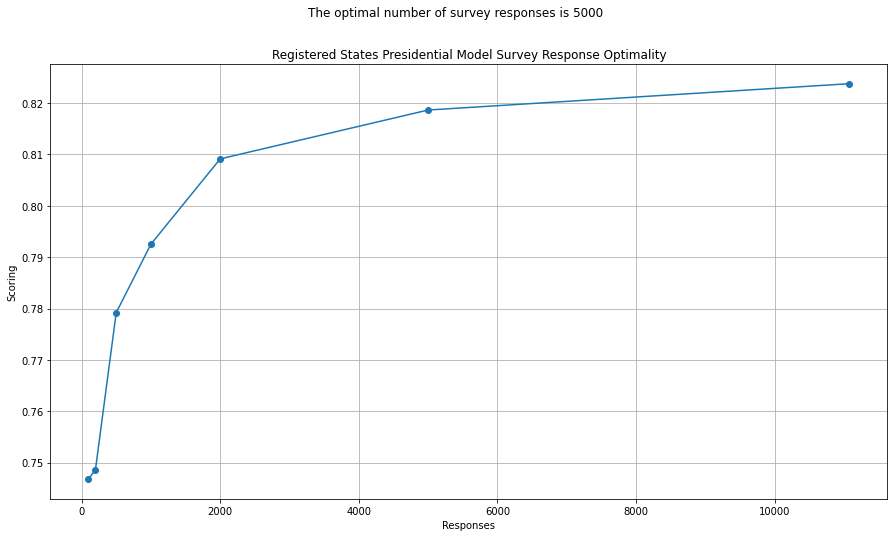

In [ ]:
mean_score_list = [np.mean(scores) for scores in score_list_of_lists]

import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
plt.plot(sample_size_list, mean_score_list, marker = 'o')
plt.title("Registered States Presidential Model Survey Response Optimality")
plt.suptitle("The optimal number of survey responses is 5000")
plt.xlabel("Responses")
plt.ylabel("Scoring")
plt.grid(True)
plt.show()

#Input the dataframe into statsmodels regression

In [ ]:
#Split the data
y2 = new_non_reg['support_pres']
X2 = new_non_reg.loc[:, new_non_reg.columns != 'support_pres']

#Train test split 75/25
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=42) 
Xs_train = sm.add_constant(X_train) #adding a constant fits a line for y = mx + b instead of just y = mx
Xs_test = sm.add_constant(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Logistic SM Regression, fitting on training data
logistic = sm.Logit(y_train, Xs_train)
pd.set_option('display.max_rows', None)
print(logistic.fit().params) #Get coefficients

Optimization terminated successfully.
         Current function value: 0.371225
         Iterations 8
const                      -3.728853
age_a22to29                 0.577561
age_b30to39                 0.851609
age_c40to49                 0.601468
black                       1.167929
hispanic                    0.295034
asian                       0.856348
other_ethnicity             1.724098
single                      0.567169
length_of_residence         0.005374
children                    0.000770
homeowner                  -0.122468
bach_degree_modeled         0.228201
post_grad_modeled           0.141972
inactive_voter              0.357377
absentee_voter              1.113354
permanent_absentee_voter   -0.105085
midterm_primary_ever       -0.440043
indy_primary_only           3.046029
dem_primary_mr              4.755929
switch_primary_dem_mr      -1.626767
hh_black_u                  0.232593
hh_liberal_donor_u          0.475074
hasreligion                 0.097397
liberal_do

In [ ]:
results = logistic.fit() # Coefficients
results.summary()

Optimization terminated successfully.
         Current function value: 0.371225
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           support_pres   No. Observations:                 8308
Model:                          Logit   Df Residuals:                     8266
Method:                           MLE   Df Model:                           41
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:                  0.4644
Time:                        19:29:21   Log-Likelihood:                -3084.1
converged:                       True   LL-Null:                       -5758.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.7289      0.216    -17.229      0.000      -4.153      -3.305
age_a22to29                  0.5776      0.203      2.851      0.004       0.180       0.975
age_b30to39                  0.8516      0.123      6.948      0.000       0.611       1.092
age_c40to49                  0.6015      0.093      6.494      0.000       0.420       0.783
black                        1.1679      0.125      9.330      0.000       0.923       1.413
hispanic                     0.2950      0.174      1.697      0.090      -0.046       0.636
asian                        0.8563      0.373      2.299      0.022       0.126       1.586
other_ethnicity              1.7241      0.513      3.358      0.001       0.718       2.731
single                       0.5672      0.080      7.060      0.000       0.410       0.725
length_of_residence          0.0054      0.007      0.766      0.444      -0.008       0.019
children                     0.0008      0.081      0.010      0.992      -0.157       0.159
homeowner                   -0.1225      0.105     -1.170      0.242      -0.328       0.083
bach_degree_modeled          0.2282      0.078      2.925      0.003       0.075       0.381
post_grad_modeled            0.1420      0.094      1.513      0.130      -0.042       0.326
inactive_voter               0.3574      0.173      2.063      0.039       0.018       0.697
absentee_voter               1.1134      0.070     15.797      0.000       0.975       1.251
permanent_absentee_voter    -0.1051      0.132     -0.794      0.427      -0.364       0.154
midterm_primary_ever        -0.4400      0.081     -5.453      0.000      -0.598      -0.282
indy_primary_only            3.0460      1.250      2.437      0.015       0.597       5.495
dem_primary_mr               4.7559      0.167     28.535      0.000       4.429       5.083
switch_primary_dem_mr       -1.6268      0.175     -9.282      0.000      -1.970      -1.283
hh_black_u                   0.2326      0.258      0.903      0.367      -0.272       0.738
hh_liberal_donor_u           0.4751      0.215      2.207      0.027       0.053       0.897
hasreligion                  0.0974      0.087      1.113      0.266      -0.074       0.269
liberal_donor                0.4280      0.089      4.796      0.000       0.253       0.603
contbrel_1                  -0.0274      0.099     -0.277      0.782      -0.222       0.167
contbpol_1                  -0.0465      0.115     -0.403      0.687      -0.273       0.180
blue_collar                  0.1321      0.112      1.183      0.237      -0.087       0.351
professional_technical       0.2086      0.103      2.020      0.043       0.006       0.411
apparel_1                    0.0775      0.083      0.935      0.350      -0.085       0.240
outdgrdn_1                   0.0383      0.096      0.399      0.690      -0.150       0.226
expensive_items_1           -0.0057      0.086     -0.066      0.947      -0.17

#Generating probabilities from TRAINing Data

True Probabilities

In [ ]:
predicted_probs_train = results.predict(Xs_train) # Generate predictions for training data
predicted_probs_train.head()

pp_df_train = pd.DataFrame(predicted_probs_train).reset_index() # Convert predicted probability array -> Dataframe
pp_df_train.columns =['index', 'predicted_probability'] # Add column names
pp_df_train.head()

,index,predicted_probability
0,4151,0.935916
1,3043,0.376406
2,21418,0.994620
3,34430,0.109657
4,5538,0.801578


In [ ]:
# Merge this data with the original cleaned binary indexed data using the original cleaned binary index
df_with_pp_train = pd.merge(non_reg.reset_index(), pp_df_train, on = 'index')
df_with_pp_train = df_with_pp_train.drop(['hash_id'], axis = 1)#remove hash_id variable from this df

# Now Merge this data with the cleaned data (before preprocessing) using Unnamed:0
df_with_pp_train = pd.merge(df_with_pp_train, non_reg_hashed, on = 'Unnamed: 0')
df_with_pp_train.columns = df_with_pp_train.columns.str.replace(r'_x$', '') #Remove suffix for each column containing _x

# Merge one last time  with the OG data using hash_id and support pres

og_data2 = og_data[(og_data.support_pres == 1.0) | (og_data.support_pres == 3.0)] ##Drop all observations where support_pres is not dem or rep

a = {1: 1, 3: 0} #Convert og_data to binary, where support democrat = 1
og_data2['support_pres'] = og_data2['support_pres'].map(a)

df_with_pp_train = df_with_pp_train[["hash_id", "support_pres", "predicted_probability"]] #First, remove all columns except for hash_id and predicted probability

df_with_pp_train = pd.merge(df_with_pp_train, og_data2, on = ['hash_id', 'support_pres'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# From the data, keep only the variables that we want to get predicted probabilities for

# Get 'Variable' column of support model party primary drafts, tabs v3, return as a list 
og_variables = list(groups['Variable'])
# Remove the number and hyphen that comes before each name, i.e. "01 - topline" -> "topline"
for i in range(len(og_variables)):
  og_variables[i] = re.sub('[0-9]+ - ', '', og_variables[i])
# Remove duplicates
og_variables = [*set(og_variables)]
og_variables

['gender_female',
 'demo_education_area',
 'region',
 'demo_combined_party',
 'demo_age_bucket_full',
 'demo_combined_ethnicity_4way',
 'retired',
 'topline',
 'nyt_urbanicity',
 'demo_vote_history',
 'gender_female x married',
 'demo_income_bucket_full',
 'state_code',
 'married',
 'education_modeled']

In [ ]:
## Get average ~TRUE~ probability for each level in TRAINING data ##

# True probabilities empty list
true_probs_train_l = []
pp_group_train_df_true = pd.DataFrame() #!!!
# Group by and average each true probability for males
for var in og_variables:
  # If the variable matches a column in the data w/true prob then calculate true prob avg for each group within the column
  if var in df_with_pp_train: 
    pp_group_train = df_with_pp_train.groupby(var)['support_pres'].mean()
    print(pp_group_train)
    pp_group_train_df=pd.DataFrame(pp_group_train) #!!!
    pp_group_train_df_true=pd.concat([pp_group_train_df_true,pp_group_train_df]) #!!!
    true_probs_train_l = true_probs_train_l + pp_group_train.tolist() #Convert true probabilities to a huge list

#We also need to get the true prob average for 4 groups: average x married
true_married_x_gender = df_with_pp_train.groupby(['married','gender_female'])['support_pres'].mean()
print(true_married_x_gender)

gender_female
0.0    0.418409
1.0    0.582831
Name: support_pres, dtype: float64
demo_education_area
01-High Education Area      0.547224
02-Medium Education Area    0.474777
03-Low Education Area       0.451249
Name: support_pres, dtype: float64
demo_combined_party
D    0.893960
I    0.450693
R    0.112672
Name: support_pres, dtype: float64
demo_age_bucket_full
a18to29    0.571429
b30to39    0.656077
c40to49    0.572056
d50to64    0.483414
e65plus    0.447429
Name: support_pres, dtype: float64
demo_combined_ethnicity_4way
A    0.700000
B    0.799308
H    0.637640
W    0.454947
Name: support_pres, dtype: float64
retired
0.0    0.503529
1.0    0.394850
Name: support_pres, dtype: float64
nyt_urbanicity
aUrban         0.702401
bInner Ring    0.583801
cOuter Ring    0.429241
dRural         0.351762
Name: support_pres, dtype: float64
demo_vote_history
Midterm Voter         0.508494
New-Reg               0.400000
Non-Voter             0.352000
Presidential Voter    0.408994
Name: support_pre

In [ ]:
## Get average ~PREDICTED~ probability for each level in TRAINING data ##

# Predicted probabilities empty list
pred_probs_train = []
pp_group_train_df_predict = pd.DataFrame() #!!!

# Group by and average each pred probability for males
for var in og_variables:
  # If the variable matches a column in the df w/pred prob then calculate pred prob avg for each group within the column
  if var in df_with_pp_train: 
    pp_group_train_2 = df_with_pp_train.groupby(var)['predicted_probability'].mean()
    print(pp_group_train_2)
    pp_group_train_df=pd.DataFrame(pp_group_train_2)
    pp_group_train_df_predict=pd.concat([pp_group_train_df_predict,pp_group_train_df]) #!!!
    pred_probs_train = pred_probs_train + pp_group_train.tolist() #Convert predicted probabilities to a huge list #!!!

#We also need to get the pred prob average for 4 groups: average x married
pred_married_x_gender = df_with_pp_train.groupby(['married','gender_female'])['predicted_probability'].mean()
print(pred_married_x_gender)

gender_female
0.0    0.449813
1.0    0.551321
Name: predicted_probability, dtype: float64
demo_education_area
01-High Education Area      0.535018
02-Medium Education Area    0.476297
03-Low Education Area       0.473772
Name: predicted_probability, dtype: float64
demo_combined_party
D    0.807555
I    0.386068
R    0.224412
Name: predicted_probability, dtype: float64
demo_age_bucket_full
a18to29    0.570787
b30to39    0.656077
c40to49    0.572056
d50to64    0.482481
e65plus    0.448133
Name: predicted_probability, dtype: float64
demo_combined_ethnicity_4way
A    0.700000
B    0.799308
H    0.637640
W    0.454947
Name: predicted_probability, dtype: float64
retired
0.0    0.503082
1.0    0.410367
Name: predicted_probability, dtype: float64
nyt_urbanicity
aUrban         0.651353
bInner Ring    0.574531
cOuter Ring    0.451690
dRural         0.359212
Name: predicted_probability, dtype: float64
demo_vote_history
Midterm Voter         0.508205
New-Reg               0.181359
Non-Voter       

#Generating probabilities from TEST Data

In [ ]:
predicted_probs_test = results.predict(Xs_test) # Generate predictions for test data

pp_df_test = pd.DataFrame(predicted_probs_test).reset_index() # Convert predicted probability array -> Dataframe

pp_df_test.columns =['index', 'predicted_probability'] # Add column names
pp_df_test.head()

,index,predicted_probability
0,20339,0.995965
1,34967,0.136092
2,28946,0.349996
3,27824,0.326930
4,6361,0.174300


In [ ]:
sample = y_test.reset_index()
sample_pred = results.predict(Xs_test)
sample_pred = pd.DataFrame(sample_pred).reset_index()
sample_pred.columns = ['index', 'predicted_probability']
sample_X = reg.reset_index()
sample_raw = pd.merge(sample, sample_pred)
sample_raw = pd.merge(sample_raw, sample_X)
sample_raw.head()

NameError: ignored

In [ ]:
## Get average ~TRUE~ probability for each level in TESTING data ##


# Merge this data with the original cleaned binary indexed data using the original cleaned binary index
df_with_pp_test = pd.merge(reg.reset_index(), pp_df_test, on = 'index')
df_with_pp_test = df_with_pp_test.drop(['hash_id'], axis = 1)#remove hash_id variable from this df

# Now Merge this data with the cleaned data (before preprocessing) using Unnamed:0
df_with_pp_test = pd.merge(df_with_pp_test, reg_hashed, on = 'Unnamed: 0')
df_with_pp_test.columns = df_with_pp_test.columns.str.replace(r'_x$', '') #Remove suffix for each column containing _x

# Merge one last time  with the OG data using hash_id and support pres
df_with_pp_test = df_with_pp_test[["hash_id", "support_pres", "predicted_probability"]] #First, remove all columns except for hash_id and predicted probability

df_with_pp_test = pd.merge(df_with_pp_test, og_data2, on = ['hash_id', 'support_pres'])

## Get average true probability for each level in test data ##

# True probabilities empty list
true_probs_test_l = []
pp_group_test_dfa = pd.DataFrame() #!!!
# Group by and average each true probability for males
for var in og_variables:
  # If the variable matches a column in the df w/true prob then calculate true prob avg for each group within the column
  if var in df_with_pp_test: 
    pp_group_test = df_with_pp_test.groupby(var)['support_pres'].mean()
    print(pp_group_test)
    pp_group_test_df=pd.DataFrame(pp_group_test) #!!!
    pp_group_test_dfa=pd.concat([pp_group_test_dfa,pp_group_test_df]) #!!!
    true_probs_test_l = true_probs_test_l + pp_group_test.tolist() #Convert true probabilities to a huge list

#We also need to get the true prob average for 4 groups: average x married
true_married_x_gender = df_with_pp_test.groupby(['married','gender_female'])['support_pres'].mean()
print(true_married_x_gender)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.


married
0.0    0.637899
1.0    0.501597
Name: support_pres, dtype: float64
education_modeled
bach_degree    0.610619
hs_or_less     0.482007
post_grad      0.651899
Name: support_pres, dtype: float64
demo_age_bucket_full
a18to29    0.733333
b30to39    0.702614
c40to49    0.578641
d50to64    0.529083
e65plus    0.498260
Name: support_pres, dtype: float64
demo_combined_party
D    0.942398
I    0.512238
R    0.066275
Name: support_pres, dtype: float64
nyt_urbanicity
aUrban         0.705069
bInner Ring    0.601140
cOuter Ring    0.495826
dRural         0.430070
Name: support_pres, dtype: float64
state_code
AZ    0.524306
CA    0.600000
CO    0.577406
DC    1.000000
DE    1.000000
FL    0.485950
IA    0.513158
ID    1.000000
KS    0.527778
KY    0.672978
MA    0.571429
MD    0.750000
ME    0.542169
NC    0.519520
NE    0.000000
NH    0.581395
NJ    0.500000
NM    0.506024
NV    0.531746
NY    0.687500
OK    0.666667
OR    0.200000
PA    0.505963
SD    0.500000
UT    0.333333
WV    1.000000


In [ ]:
## Get average ~PREDICTED~ probability for each level in TESTing data ##

# Predicted probabilities empty list
pred_probs_test = []
pp_group_test_dfb = pd.DataFrame() #!!!

# Group by and average each pred probability for males
for var in og_variables:
  # If the variable matches a column in the df w/pred prob then calculate pred prob avg for each group within the column
  if var in df_with_pp_test: 
    pp_group_test_2 = df_with_pp_test.groupby(var)['predicted_probability'].mean()
    print(pp_group_test_2)
    pp_group_test_df=pd.DataFrame(pp_group_test_2)
    pp_group_test_dfb=pd.concat([pp_group_test_dfb,pp_group_test_df]) #!!!
    pred_probs_test = pred_probs_test + pp_group_test.tolist() #Convert predicted probabilities to a huge list #!!!

#We also need to get the pred prob average for 4 groups: average x married
pred_married_x_gender = df_with_pp_test.groupby(['married','gender_female'])['predicted_probability'].mean()
print(pred_married_x_gender)

married
0.0    0.641987
1.0    0.500523
Name: predicted_probability, dtype: float64
education_modeled
bach_degree    0.594999
hs_or_less     0.493285
post_grad      0.641893
Name: predicted_probability, dtype: float64
demo_age_bucket_full
a18to29    0.689062
b30to39    0.695146
c40to49    0.535961
d50to64    0.536909
e65plus    0.514907
Name: predicted_probability, dtype: float64
demo_combined_party
D    0.935821
I    0.354183
R    0.152040
Name: predicted_probability, dtype: float64
nyt_urbanicity
aUrban         0.669812
bInner Ring    0.604943
cOuter Ring    0.497398
dRural         0.450031
Name: predicted_probability, dtype: float64
state_code
AZ    0.533126
CA    0.822522
CO    0.550427
DC    0.996391
DE    0.326633
FL    0.477612
IA    0.550683
ID    0.247658
KS    0.472662
KY    0.646286
MA    0.671757
MD    0.496539
ME    0.504455
NC    0.521983
NE    0.179955
NH    0.563190
NJ    0.524186
NM    0.517011
NV    0.555043
NY    0.594750
OK    0.501919
OR    0.280264
PA    0.548181


#Creating a dataframe with both actual and predicted support probabilities for TRAINing data (double check w/Hongbo)

In [28]:
#a = true, b = predicted
pp_group_train_df_true.drop(pp_group_train_df_true.index[[17,18,-1,-2]], inplace=True)
pp_group_train_df_predict.drop(pp_group_train_df_predict.index[[17,18,-1,-2]], inplace=True)

app_1=pd.DataFrame([0.531199,0.675994,0.371730,0.537469], index=['Not married: Male', 'Not married: Female','Marrried: Male','Married: Female'],columns=["support_pres"])
app_2=pd.DataFrame([0.562412,0.647999,0.403213,0.504247], index=['Not married: Male', 'Not married: Female','Marrried: Male','Married: Female'],columns=["predicted_probability"])
pp_group_train_df_true=pd.concat([pp_group_train_df_true,app_1])
pp_group_train_df_predict=pd.concat([pp_group_train_df_predict,app_2])

pp_group_train_df_all=pd.concat([pp_group_train_df_true, pp_group_train_df_predict])
print(pp_group_train_df_all)

                          support_pres  predicted_probability
01-High Education Area        0.547224                    NaN
02-Medium Education Area      0.474777                    NaN
03-Low Education Area         0.451249                    NaN
D                             0.893960                    NaN
I                             0.450693                    NaN
R                             0.112672                    NaN
a18to29                       0.571429                    NaN
b30to39                       0.656077                    NaN
c40to49                       0.572056                    NaN
d50to64                       0.483414                    NaN
e65plus                       0.447429                    NaN
A                             0.700000                    NaN
B                             0.799308                    NaN
H                             0.637640                    NaN
W                             0.454947                    NaN
aUrban  

In [29]:
pp_group_train_df_all = pd.DataFrame(pp_group_train_df_all)
pp_group_train_df_all.to_csv("pres_nonreg_validation.csv")

In [ ]:
pp_df_train['predicted_probability']= pp_df_train['predicted_probability']>0.5
pp_df_train['predicted_probability']= pp_df_train['predicted_probability'].astype(int)
pp_df_train['real_value']=y_train.tolist()
pp_df_train.head()

,index,predicted_probability,real_value
0,4151,1,1
1,3043,0,1
2,21418,1,1
3,34430,0,0
4,5538,1,0


In [ ]:
dfs=np.array_split(pp_df_train, 10)
P=[]
R=[]
for i in dfs:
  p=i["predicted_probability"].sum()
  r=i["real_value"].sum()
  P.append(p)
  R.append(r)
print(P)
print(R)

[373, 359, 360, 365, 364, 311, 375, 347, 347, 327]
[425, 414, 405, 439, 429, 390, 431, 421, 402, 402]


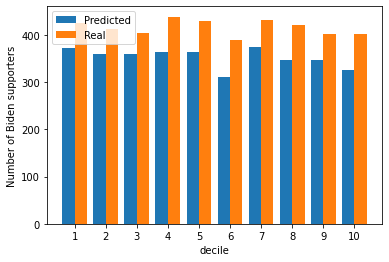

In [ ]:
import matplotlib.pyplot as plt 
X_p = [1,2,3,4,5,6,7,8,9,10]
X_axis = np.arange(len(X_p))
plt.bar(X_axis - 0.2, P, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, R, 0.4, label = 'Real')
plt.xticks(X_axis, X_p)
plt.xlabel("decile")
plt.ylabel("Number of Biden supporters")

plt.legend()


In [ ]:
dec0 = y_train.reset_index()
dec_pred = results.predict(Xs_train)
dec_pred = pd.DataFrame(dec_pred).reset_index()
dec_pred.columns = ['index', 'predicted_probability']
dec_raw = pd.merge(dec0, dec_pred)
dec_raw.head()

,index,support_pres,predicted_probability
0,4151,1,0.935916
1,3043,1,0.376406
2,21418,1,0.994620
3,34430,0,0.109657
4,5538,0,0.801578


In [ ]:
dfs2 = dec_raw.sort_values('predicted_probability')
dfs2=np.array_split(dfs2, 10)
P2 = []
R2 = []
for i in dfs2:
  p=i["predicted_probability"].mean()
  r=i["support_pres"].mean()
  P2.append(p)
  R2.append(r)

print(P2)
print(R2)

[0.05955051750653915, 0.10739689916266815, 0.15987429190124153, 0.22848993032153372, 0.3179232041971634, 0.45447538876726085, 0.7599045015830886, 0.9488922510090839, 0.9777592939364446, 0.9917138336819054]
[0.048134777376654635, 0.11070998796630566, 0.11793020457280386, 0.23706377858002406, 0.3200962695547533, 0.49578820697954273, 0.7713598074608905, 0.9542719614921781, 0.9722891566265061, 0.9783132530120482]


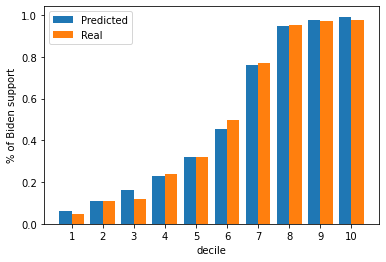

In [ ]:
import matplotlib.pyplot as plt 
X_p = [1,2,3,4,5,6,7,8,9,10]
X_axis = np.arange(len(X_p))
plt.bar(X_axis - 0.2, P2, 0.4, label = 'Predicted')
plt.bar(X_axis + 0.2, R2, 0.4, label = 'Real')
plt.xticks(X_axis, X_p)
plt.xlabel("decile")
plt.ylabel("% of Biden support")

plt.legend()